# Introduction to BlenderProc

Note: This notebook makes use of the basic example which is available under `examples/basic`

In this notebook, we will see how can we quickly set up the BlenderProc environment inside Google Colab and how can we generate photorealistic data which can later be used for many different applications.

We firstly clone the official BlenderProc repo (repository) from GitHub using Git

In [1]:
!git clone https://github.com/DLR-RM/BlenderProc.git
%cd "BlenderProc"

Cloning into 'BlenderProc'...
remote: Enumerating objects: 32043, done.
remote: Counting objects: 100% (8026/8026), done.
remote: Compressing objects: 100% (1670/1670), done.
remote: Total 32043 (delta 6417), reused 7820 (delta 6307), pack-reused 24017
Receiving objects: 100% (32043/32043), 67.04 MiB | 4.23 MiB/s, done.
Resolving deltas: 100% (23690/23690), done.
/content/BlenderProc
Branch 'blenderproc2-alpha' set up to track remote branch 'blenderproc2-alpha' from 'origin'.
Switched to a new branch 'blenderproc2-alpha'


To be able to use the blenderproc command, we install it via pip:

In [2]:
!pip install -e .

Obtaining file:///content/BlenderProc
  Attempting uninstall: blenderproc
    Found existing installation: blenderproc 2.0.0a4
    Uninstalling blenderproc-2.0.0a4:
      Successfully uninstalled blenderproc-2.0.0a4
  Running setup.py develop for blenderproc


In order to run BlenderProc inside Google Colab, we first have to update the `LD_PRELOAD` environment variable

In [3]:
import os

# updating the LD_PRELOAD env variable
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

Finally, we run the BlenderProc program using the `blenderproc run`  along with required command line arguments. The first argument specifies the location of the python file that should be executed. The second argument corresponds to the camera pose file. In this case, we have specified two camera poses in the `examples/basics/basic/camera_positions` file. The third argument correponds to the output directory where our generated data will be stored. 

With the flag `--blender-install-path`, we specify the custom Blender install path which is necessary, as no user folder is availabe in colab.

In [4]:
# run the BlenderProc basic example
!blenderproc run examples/basics/basic/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/basic/output --blender-install-path ./

100% (155802244 of 155802244) |###########| Elapsed Time: 0:00:06 Time:  0:00:06
Using blender in ./blender-2.93.0-linux-x64
Using temporary directory: /dev/shm/blender_proc_74ec8a987627418b9b44a7994f52121f
Blender 2.93.0 (hash 84da05a8b806 built 2021-06-02 11:29:24)
Looking in links: /tmp/tmpckz_hk4o
Processing /tmp/tmpckz_hk4o/setuptools-49.2.1-py3-none-any.whl
Processing /tmp/tmpckz_hk4o/pip-20.2.3-py2.py3-none-any.whl
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

blenderproc 2.0.0a4 requires h5py, which is not installed.
blenderproc 2.0.0a4 requires matplotlib, which is not installed.
blenderproc 2.0.0a4 requires numpy, which is not installed.
blenderproc 2.0.0a4 requires Pillow, which is not installed.
blenderproc 2.0.0a4 requires pyyam

We visualize the first rendered color, depth and normal image which corresponds to the `0.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/0.hdf5 contains the following keys: <KeysViewHDF5 ['blender_proc_version', 'colors', 'distance', 'normals']>


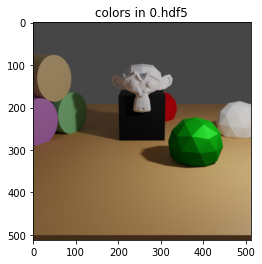

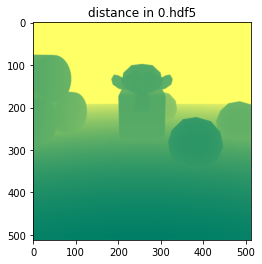

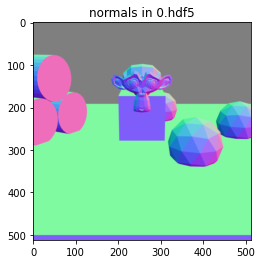

In [5]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/0.hdf5"

We visualize the second rendered color, depth and normal image which corresponds to the `1.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/1.hdf5 contains the following keys: <KeysViewHDF5 ['blender_proc_version', 'colors', 'distance', 'normals']>


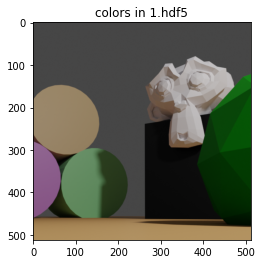

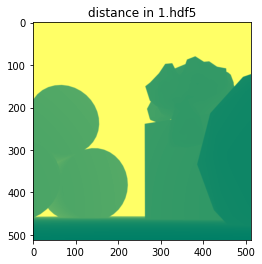

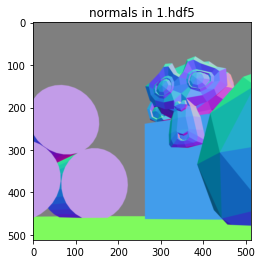

In [6]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/1.hdf5"